# Multi-national Food API analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import numpy as np
import wordcloud

## Retrieve each recipe according to id.

In [2]:
df_list = []
base_url = 'https://www.themealdb.com/api/json/v1/1/lookup.php?i='
for page in range(52769, 53065):
    temp_res = requests.get(base_url + str(page))
    temp_json = temp_res.json()
    temp_df = pd.DataFrame.from_dict(temp_json['meals'])
    df_list.append(temp_df)

food_df = pd.concat(df_list, ignore_index = True)

In [3]:
food_df

,idMeal,strMeal,strDrinkAlternate,strCategory,strArea,strInstructions,strMealThumb,strTags,strYoutube,strIngredient1,...,strMeasure15,strMeasure16,strMeasure17,strMeasure18,strMeasure19,strMeasure20,strSource,strImageSource,strCreativeCommonsConfirmed,dateModified
0,52769,Kapsalon,None,Lamb,Dutch,Cut the meat into strips. Heat oil in a pan an...,https://www.themealdb.com/images/media/meals/s...,Snack,https://www.youtube.com/watch?v=UIcuiU1kV8I,Fries,...,,None,None,None,None,None,None,None,None,None
1,52770,Spaghetti Bolognese,None,Beef,Italian,Put the onion and oil in a large pan and fry o...,https://www.themealdb.com/images/media/meals/s...,"Pasta,Meat",https://www.youtube.com/watch?v=-gF8d-fitkU,onions,...,,None,None,None,None,None,None,None,None,None
2,52771,Spicy Arrabiata Penne,None,Vegetarian,Italian,Bring a large pot of water to a boil. Add kosh...,https://www.themealdb.com/images/media/meals/u...,"Pasta,Curry",https://www.youtube.com/watch?v=1IszT_guI08,penne rigate,...,,None,None,None,None,None,None,None,None,None
3,52772,Teriyaki Chicken Casserole,None,Chicken,Japanese,Preheat oven to 350° F. Spray a 9x13-inch baki...,https://www.themealdb.com/images/media/meals/w...,"Meat,Casserole",https://www.youtube.com/watch?v=4aZr5hZXP_s,soy sauce,...,,None,None,None,None,None,None,None,None,None
4,52773,Honey Teriyaki Salmon,None,Seafood,Japanese,Mix all the ingredients in the Honey Teriyaki ...,https://www.themealdb.com/images/media/meals/x...,"Fish,Breakfast,DateNight",https://www.youtube.com/watch?v=4MpYuaJsvRw,Salmon,...,,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,53060,Burek,None,Side,Croatian,Fry the finely chopped onions and minced meat ...,https://www.themealdb.com/images/media/meals/t...,"Streetfood, Onthego",https://www.youtube.com/watch?v=YsJXZwE5pdY,Filo Pastry,...,,,,,,,https://www.visit-croatia.co.uk/croatian-cuisi...,None,None,None
276,53061,Fresh sardines,None,Side,Croatian,Wash the fish under the cold tap. Roll in the ...,https://www.themealdb.com/images/media/meals/n...,Fresh,https://www.youtube.com/watch?v=DDaZoXP1Mdc,Sardines,...,,,,,,,https://www.visit-croatia.co.uk/croatian-cuisi...,None,None,None
277,53062,Walnut Roll Gužvara,None,Dessert,Croatian,Mix all the ingredients for the dough together...,https://www.themealdb.com/images/media/meals/u...,Nutty,https://www.youtube.com/watch?v=Q_akngSJVrQ,Flour,...,,,,,,,https://www.visit-croatia.co.uk/croatian-cuisi...,None,None,None
278,53063,Chivito uruguayo,None,Beef,Unknown,Crush the meat so that it is finite and we put...,https://www.themealdb.com/images/media/meals/n...,None,https://www.youtube.com/watch?v=0PXbbL1QdaA&ab...,Beef Brisket,...,,,,,,,https://cookpad.com/uy/recetas/116102-chivito-...,None,None,None


In [76]:
food_df.describe()

,idMeal,strMeal,strDrinkAlternate,strCategory,strArea,strInstructions,strMealThumb,strTags,strYoutube,strIngredient1,...,strMeasure15,strMeasure16,strMeasure17,strMeasure18,strMeasure19,strMeasure20,strSource,strImageSource,strCreativeCommonsConfirmed,dateModified
count,280,280,280,280,280,280,280,280,280,280,...,280,280,280,280,280,280,280,280,280,280
unique,280,280,1,14,27,279,280,143,266,140,...,44,38,24,18,13,10,250,1,1,1
top,52769,Kapsalon,NA,Dessert,British,"Heat the flat grill plate over a low heat, on ...",https://www.themealdb.com/images/media/meals/s...,NA,,Butter,...,,,,,,,,NA,NA,NA
freq,1,1,280,62,55,2,1,108,14,24,...,139,141,149,159,162,167,20,280,280,280


In [4]:
food_df.isnull().sum()

idMeal                           0
strMeal                          0
strDrinkAlternate              280
strCategory                      0
strArea                          0
strInstructions                  0
strMealThumb                     0
strTags                        108
strYoutube                       0
strIngredient1                   0
strIngredient2                   0
strIngredient3                   0
strIngredient4                   0
strIngredient5                   0
strIngredient6                   0
strIngredient7                   0
strIngredient8                   0
strIngredient9                   2
strIngredient10                  2
strIngredient11                  2
strIngredient12                  4
strIngredient13                  6
strIngredient14                  7
strIngredient15                  7
strIngredient16                 17
strIngredient17                 17
strIngredient18                 18
strIngredient19                 18
strIngredient20     

In [5]:
food_df = food_df.fillna('NA')

In [78]:
food_df.dtypes

idMeal                         object
strMeal                        object
strDrinkAlternate              object
strCategory                    object
strArea                        object
strInstructions                object
strMealThumb                   object
strTags                        object
strYoutube                     object
strIngredient1                 object
strIngredient2                 object
strIngredient3                 object
strIngredient4                 object
strIngredient5                 object
strIngredient6                 object
strIngredient7                 object
strIngredient8                 object
strIngredient9                 object
strIngredient10                object
strIngredient11                object
strIngredient12                object
strIngredient13                object
strIngredient14                object
strIngredient15                object
strIngredient16                object
strIngredient17                object
strIngredien

## Overall statistics

Text(0.5, 1.0, 'The Category Distribution of Recipes')

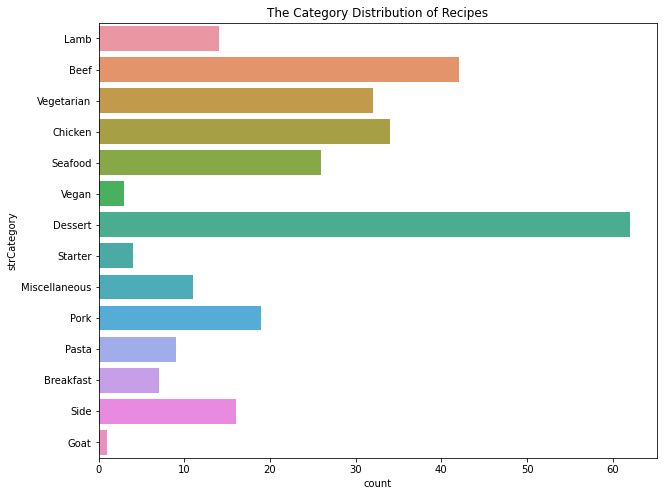

In [74]:
plt.figure(figsize = (10, 8))
sns.countplot(data = food_df, y = 'strCategory')
plt.title('The Category Distribution of Recipes')

### This API have plenty of dessert recipes. Not suitable for dieter.

Text(0.5, 1.0, 'The Area Distribution of Recipes')

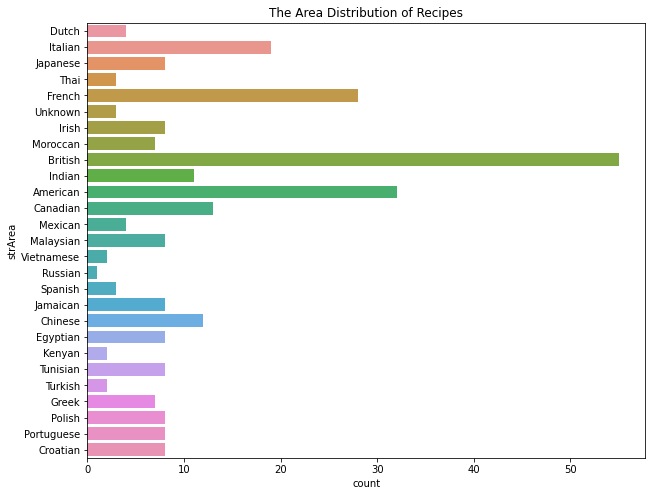

In [75]:
plt.figure(figsize = (10, 8))
sns.countplot(data = food_df, y = 'strArea')
plt.title('The Area Distribution of Recipes')

## British, American and French are top3 area with recipes.
## The analysis below focus on these 3 areas.

In [42]:
british = food_df[food_df['strArea'] == 'British']
american = food_df[food_df['strArea'] == 'American']
french = food_df[food_df['strArea'] == 'French']

british.index = np.arange(british.shape[0])
american.index = np.arange(american.shape[0])
french.index = np.arange(french.shape[0])

In [43]:
tags = {}

for i in range(british.shape[0]):
    lst = []
    lst = british['strTags'][i].split(',')
    
    for tag in lst:
        if tag in tags:
            tags[tag] += 1
        else:
            tags[tag] = 1

b_tags_df = pd.DataFrame(data = tags.values(), index = tags.keys(), columns = ['counts'])

In [44]:
tags = {}

for i in range(american.shape[0]):
    lst = []
    lst = american['strTags'][i].split(',')
    
    for tag in lst:
        if tag in tags:
            tags[tag] += 1
        else:
            tags[tag] = 1

a_tags_df = pd.DataFrame(data = tags.values(), index = tags.keys(), columns = ['counts'])

In [45]:
tags = {}

for i in range(french.shape[0]):
    lst = []
    lst = french['strTags'][i].split(',')
    
    for tag in lst:
        if tag in tags:
            tags[tag] += 1
        else:
            tags[tag] = 1

f_tags_df = pd.DataFrame(data = tags.values(), index = tags.keys(), columns = ['counts'])

In [46]:
b_tags_df = b_tags_df.drop('NA', axis = 0)
a_tags_df = a_tags_df.drop('NA', axis = 0)
f_tags_df = f_tags_df.drop('NA', axis = 0)

b_tags_df = b_tags_df.sort_values('counts', ascending = False)
a_tags_df = a_tags_df.sort_values('counts', ascending = False)
f_tags_df = f_tags_df.sort_values('counts', ascending = False)

Text(0.5, 1.0, 'Most popular cuisine of British')

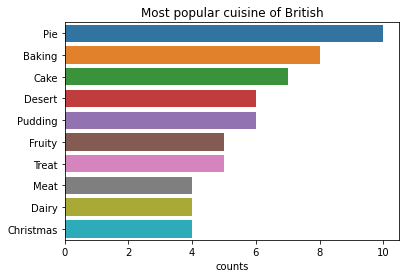

In [47]:
plt.figure(figsize = (6, 4))
sns.barplot(data = b_tags_df[:10], x = b_tags_df['counts'][:10], y = b_tags_df.index[:10])
plt.title('Most popular cuisine of British')

Text(0.5, 1.0, 'Most popular cuisine of American')

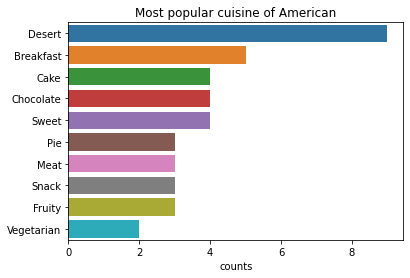

In [48]:
plt.figure(figsize = (6, 4))
sns.barplot(data = a_tags_df[:10], x = a_tags_df['counts'][:10], y = a_tags_df.index[:10])
plt.title('Most popular cuisine of American')

Text(0.5, 1.0, 'Most popular cuisine of French')

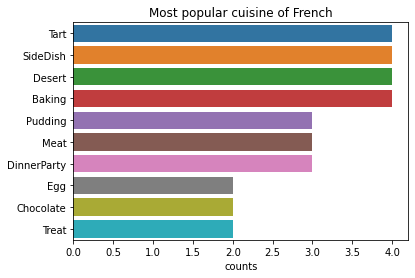

In [49]:
sns.barplot(data = f_tags_df[:10], x = f_tags_df['counts'][:10], y = f_tags_df.index[:10])
plt.title('Most popular cuisine of French')

## Obviously, British people fall in love with sweet things. Their favoriate cuisine are pie, baking, cake, pudding, fruitly and treat.
## American people also like dessert and they also attach importance to breakfast.
## French people are good at making tart. In addition, they are expert of sidedishes.

# 
# 
# 

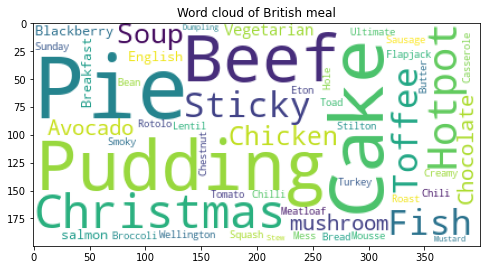

In [34]:
food_joined = " ".join(food_df[food_df['strArea'] == 'British']['strMeal'])
plt.figure(figsize = (8, 4.5))
food_wc = wordcloud.WordCloud(max_words = 50, background_color = 'white')
food_cloud = food_wc.generate(food_joined)
plt.imshow(food_cloud)
plt.title('Word cloud of British meal')
plt.show()

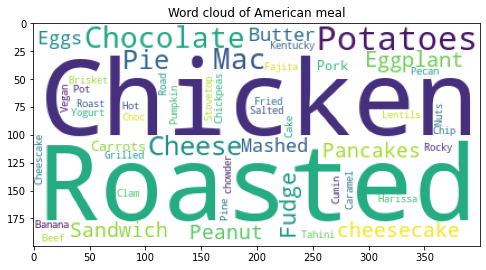

In [35]:
food_joined = " ".join(food_df[food_df['strArea'] == 'American']['strMeal'])
plt.figure(figsize = (8, 4.5))
food_wc = wordcloud.WordCloud(max_words = 50, background_color = 'white')
food_cloud = food_wc.generate(food_joined)
plt.imshow(food_cloud)
plt.title('Word cloud of American meal')
plt.show()

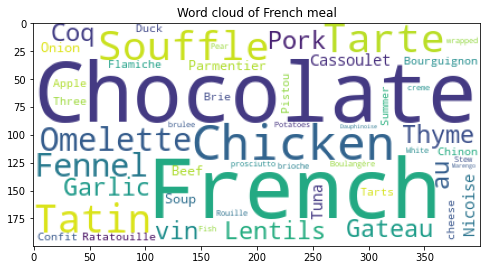

In [36]:
food_joined = " ".join(food_df[food_df['strArea'] == 'French']['strMeal'])
plt.figure(figsize = (8, 4.5))
food_wc = wordcloud.WordCloud(max_words = 50, background_color = 'white')
food_cloud = food_wc.generate(food_joined)
plt.imshow(food_cloud)
plt.title('Word cloud of French meal')
plt.show()

## According to the meal name:
### British people prefer desserts.
### American people are big fans of roasted chicken.
### French people love chocolate.

# 
# 
## What is Chinese people prefer? 
## Firstly, let's see what are the common ingredients among the world.

In [55]:
ingredients = {}
col = 'strIngredient'
for i in range(food_df.shape[0]):
    for j in range(1, 21):
        ingredient = food_df[col + str(j)][i]
        if ingredient in ingredients:
            ingredients[ingredient] += 1
        else:
            ingredients[ingredient] = 1

In [56]:
ingre = pd.DataFrame(data = ingredients.values(), index = ingredients.keys(), columns = ['counts'])
ingre = ingre.sort_values('counts', ascending = False)
ingre = ingre.drop(['', 'NA'], axis = 0)

Text(0.5, 1.0, 'Most popular ingredients among the world')

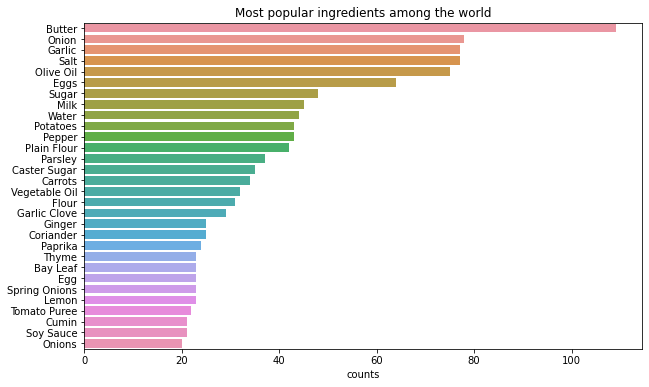

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(data = ingre[:30], x = ingre['counts'][:30], y = ingre.index[:30])
plt.title('Most popular ingredients among the world')

### The most widely-used ingredients among dataset are as above. 
### Most of them are condiments with special flavor, like onion, garlic, parsley, pepper and coriander. 
### The rest are common and cheap, like eggs, milk, water, potatoes.

# 
## Next, let's see which Chinese ingredient is popular.

In [69]:
chinese = food_df[food_df['strArea'] == 'Chinese']
chinese.index = np.arange(chinese.shape[0])

In [60]:
chinese_ingredients = {}
col = 'strIngredient'
for i in range(chinese.shape[0]):
    for j in range(1, 21):
        ingredient = food_df[col + str(j)][i]
        if ingredient in chinese_ingredients:
            chinese_ingredients[ingredient] += 1
        else:
            chinese_ingredients[ingredient] = 1

In [61]:
chinese_ingre = pd.DataFrame(data = chinese_ingredients.values(), index = chinese_ingredients.keys(), columns = ['counts'])
chinese_ingre = chinese_ingre.sort_values('counts', ascending = False)
chinese_ingre = chinese_ingre.drop(['', 'NA'], axis = 0)

Text(0.5, 1.0, 'Most popular ingredients of Chinese')

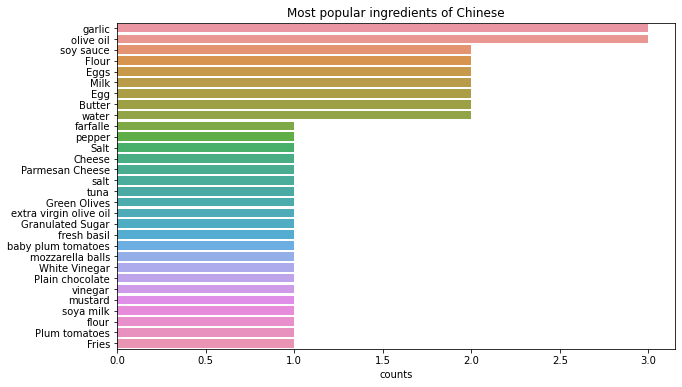

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(data = chinese_ingre[:30], x = chinese_ingre['counts'][:30], y = chinese_ingre.index[:30])
plt.title('Most popular ingredients of Chinese')

## We love garlic too. 
## Notably, soy sauce comes out top. That makes sense.

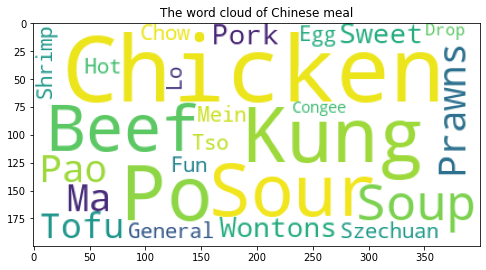

In [71]:
food_joined = " ".join(food_df[food_df['strArea'] == 'Chinese']['strMeal'])
plt.figure(figsize = (8, 4.5))
food_wc = wordcloud.WordCloud(max_words = 50, background_color = 'white')
food_cloud = food_wc.generate(food_joined)
plt.imshow(food_cloud)
plt.title('The word cloud of Chinese meal')
plt.show()

## We can find some Chinese characteristic food like Kung Pao chicken, tofu and wontons.

## In terms of cooking methods:

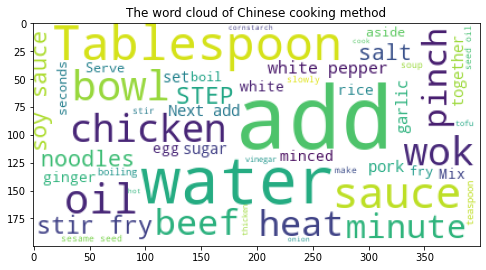

In [72]:
food_joined = " ".join(food_df[food_df['strArea'] == 'Chinese']['strInstructions'])
plt.figure(figsize = (8, 4.5))
food_wc = wordcloud.WordCloud(max_words = 50, background_color = 'white')
food_cloud = food_wc.generate(food_joined)
plt.imshow(food_cloud)
plt.title('The word cloud of Chinese cooking method')
plt.show()

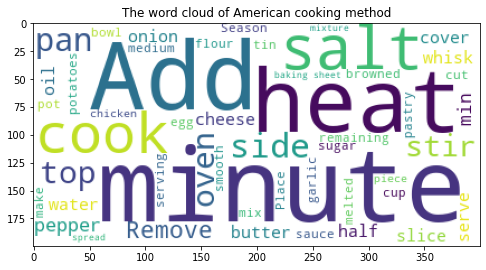

In [73]:
food_joined = " ".join(food_df[food_df['strArea'] == 'American']['strInstructions'])
plt.figure(figsize = (8, 4.5))
food_wc = wordcloud.WordCloud(max_words = 50, background_color = 'white')
food_cloud = food_wc.generate(food_joined)
plt.imshow(food_cloud)
plt.title('The word cloud of American cooking method')
plt.show()

## Compared with American people, the biggest difference is that, we don't care much about time when cooking.